In [3]:
#Here I import the libraries I am going to use
import pandas as pd 
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#I define the function to connect to my local movieDatabase server.
def connectDF():
    conn = psycopg2.connect(
        host="localhost",
        database="movieDatabase",
        user="postgres",
        password="cat")
    return conn

In [5]:
#I establish the connection with my server
conn = connectDF()
print("Connection success.")

Connection success.


In [30]:
#Here I run the SQL query to get the average box office revenue per month. The results are stored into a dataframe
df1 = pd.read_sql('''
        SELECT (ROUND(AVG(s.total_box_office)) / 1000000) AS box_office, EXTRACT(MONTH FROM s.reldate) AS month
FROM sales as s
GROUP BY month
ORDER BY month                      
        ''', conn)
#This is the last data I needed from the postgres server so I close the connection.
conn.close()
print("Connection closed.")

Connection closed.


C:\Users\olavr\AppData\Local\Temp\ipykernel_15920\2578223920.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql('''


c:\Users\olavr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\olavr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\olavr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


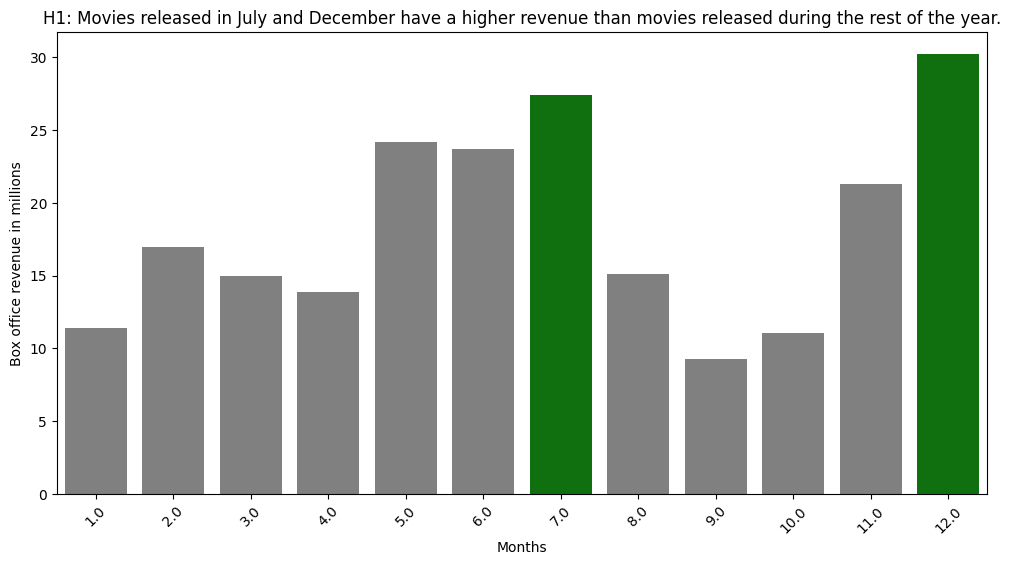

In [28]:
#Here I create a Barplot with the months on the X-axis and the average box office revenue on the Y-axis.
#Every value abox 25 million will be green to see which months perform the best.
plt.figure(figsize=(12, 6))
sns.barplot(data=df1, x='month', y='box_office', palette = ['grey' if (x < 25) else 'green' for x in df1['box_office']])  # You can adjust 'bins' as needed
plt.xticks(rotation=45)
plt.xlabel('Months')
plt.ylabel('Box office revenue in millions')
plt.title('H1: Movies released in July and December have a higher revenue than movies released during the rest of the year.')
plt.show()